# 分析报告

### 22019207063 梁宇佳

## 一、导入所需包

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 二、导入数据以及数据预处理

导入Basket和Item表,并显示前5行

In [3]:
myData1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv', encoding="gbk")
myData2=pd.read_csv('item-2018-06-01-2018-07-05.csv', encoding="gbk")

print(myData1.head(5))
print(myData2.head(5))

  SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458         8.0
1    2018-06-01       D007       3     250200        32.7
2    2018-06-01       D007       1     161068        16.8
3    2018-06-01       D007       8       5325        30.4
4    2018-06-01       D007       8       5361       191.3
        SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0         

检验是否有缺失值并删除

In [4]:
print(myData1.isnull().any())
print("*"*30)
print(myData2.isnull().any())

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool
******************************
SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


## 三、数据分析

In [15]:
#商品数据基本情况
prod = list(data2['PROD_CODE'].unique())   
len(prod) 

19264

In [16]:
#售出的商品数量
b = pd.DataFrame(data2['PROD_CODE'].value_counts()) # 统计每个唯一值出现了多少次
bhead=b.head(10)
bhead

,PROD_CODE
21835,10417
194690,9498
205540,8422
72811,7733
197532,6420
205437,5945
1557,5549
75283,5338
216571,5073
198366,4860


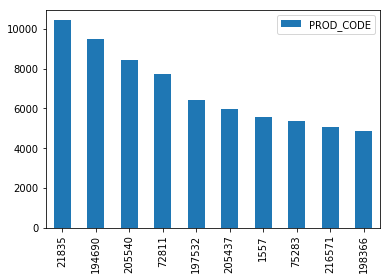

In [17]:
#绘制商品数量图
bhead.plot(kind='bar')

In [18]:
#统计商店数量
STORE = list(data2['STORE_CODE'].unique())   
len(STORE) 

24

In [19]:
data2['STORE_CODE'].value_counts()

D002    211224
A001    170358
D007    102455
A008     94453
A013     73599
A006     67252
D004     66294
D006     58769
A012     56536
A021     55043
A009     50734
D008     49930
A016     48929
A019     45292
D005     44281
A007     43491
A010     42489
A004     39853
A018     39803
D009     39189
A022     38448
D010     30578
A017     25432
D003     19868
Name: STORE_CODE, dtype: int64

In [17]:
# 根据STORE_CODE统计销售额
sell1 =myData1.groupby(by="STORE_CODE")
sell_groupby_STORE_CODE = sell1["BASK_SPEND"].sum()
sell_groupby_STORE_CODE

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

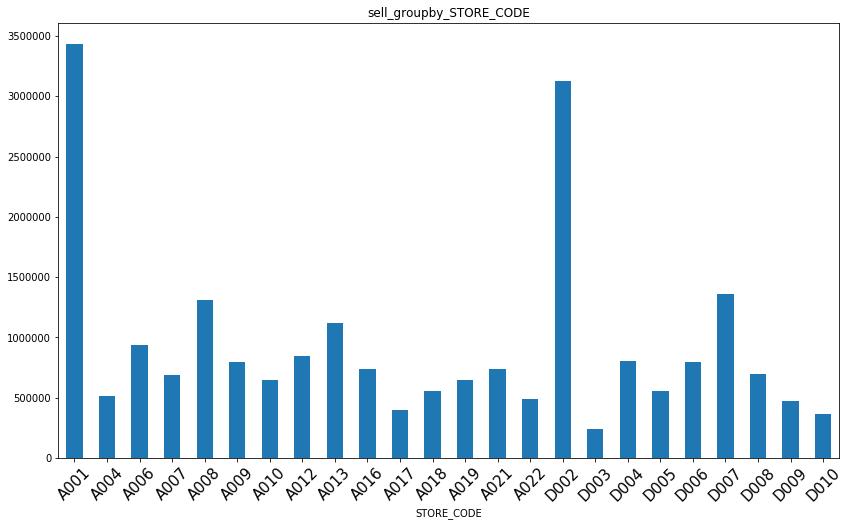

In [24]:
#根据STORE_CODE统计销售额
sell_groupby_STORE_CODE.plot(kind='bar',title='sell_groupby_STORE_CODE',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

In [21]:
#每个店铺中的商品数量
B=data2.groupby(['STORE_CODE']).PROD_CODE.nunique()
#降序排列
B.sort_values(ascending=False)

STORE_CODE
D002    10797
A001     7592
D007     6466
A013     5443
A008     5282
D006     5035
A012     4969
D008     4927
A021     4811
A006     4755
D004     4670
A009     4596
A007     4584
A010     4494
A022     4316
A016     4264
D005     4247
A018     4173
D009     4147
A019     3678
D010     3653
A004     3574
A017     3290
D003     2894
Name: PROD_CODE, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

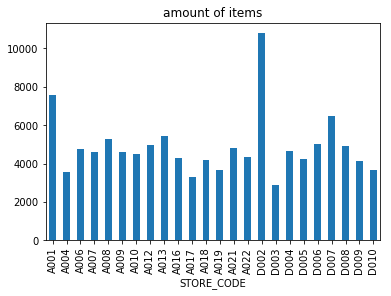

In [23]:
plt.rcParams["font.sans-serif"]='SimHei'
B.plot(kind='bar',title='amount of items')
plt.show

In [18]:
#根据SHOP_DATETIME统计总销售额
sell2 =myData1.groupby(by="SHOP_DATETIME")
sell_groupby_SHOP_DATETIME = sell2["BASK_SPEND"].sum()
sell_groupby_SHOP_DATETIME

SHOP_DATETIME
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

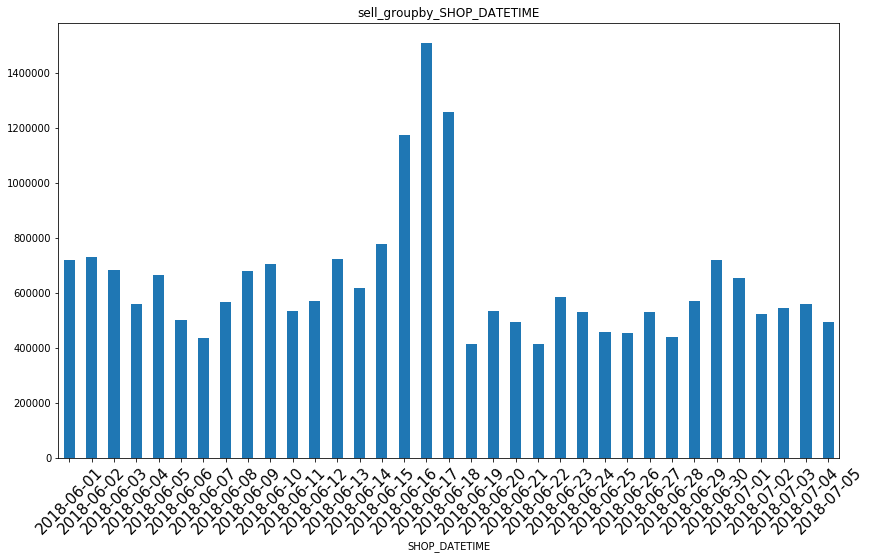

In [22]:
#绘制根据不同的日期，每日销量总数的柱状图
Bask_spend_dt=myData1['BASK_SPEND'].groupby(myData1['SHOP_DATETIME']).sum()
plt.rcParams['axes.unicode_minus'] = False
Bask_spend_dt.plot(kind='bar',title='sell_groupby_SHOP_DATETIME',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

In [25]:
#统计A类店铺每天的销售额
A=data2.loc[data['STORE_CODE'].str.contains('A')]
A_SPEND=A[['SDATE','ITEM_SPEND']].groupby('SDATE').sum()
A_SPEND.rename(columns={'ITEM_SPEND':'A_SPEND'}, inplace = True)#更改列名
A_SPEND

,A_SPEND
SDATE,
2018-06-01,339164.44
2018-06-02,325172.02
2018-06-03,304963.88
2018-06-04,227887.71
2018-06-05,256051.69
2018-06-06,296345.30
2018-06-07,245125.88
2018-06-08,332240.77
2018-06-09,414456.64


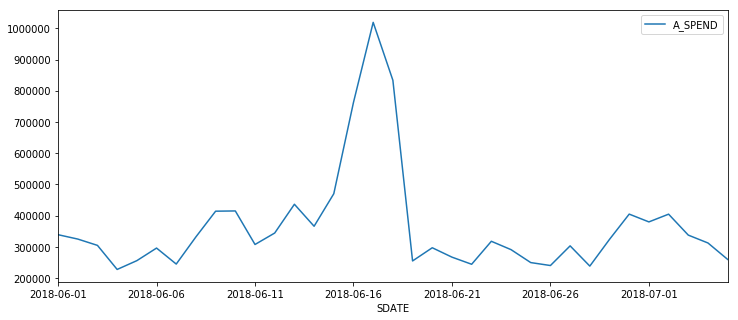

In [26]:
#A类店铺销售额趋势
plt.rcParams['figure.figsize'] = (12.0, 5.0)
A_SPEND.plot()
plt.show()